In [1]:
from keras.layers import Input, Lambda, Dense
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import os.path
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)

TensorFlow version: 2.6.2
Keras version: 2.6.0


In [3]:
df = pd.read_csv('../input/happy-whale-and-dolphin/train.csv')
df.head()

,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392


In [4]:
df.shape

(51033, 3)

In [5]:
df.species.nunique()

30

In [6]:
df.species.value_counts().sort_index()

beluga                       7443
blue_whale                   4830
bottlenose_dolphin           9664
bottlenose_dolpin            1117
brydes_whale                  154
commersons_dolphin             90
common_dolphin                347
cuviers_beaked_whale          341
dusky_dolphin                3139
false_killer_whale           3326
fin_whale                    1324
frasiers_dolphin               14
globis                        116
gray_whale                   1123
humpback_whale               7392
kiler_whale                   962
killer_whale                 1493
long_finned_pilot_whale       238
melon_headed_whale           1689
minke_whale                  1608
pantropic_spotted_dolphin     145
pilot_whale                   262
pygmy_killer_whale             76
rough_toothed_dolphin          60
sei_whale                     428
short_finned_pilot_whale      367
southern_right_whale          866
spinner_dolphin              1700
spotted_dolphin               490
white_sided_do

In [7]:
df.loc[df['species'] == 'beluga', 'species'] = 'beluga_whale'
df.loc[df['species'] == 'globis', 'species'] = 'pilot_whale'
df.loc[df['species'] == 'bottlenose_dolphin', 'species'] = 'bottlenose_dolphin'
df.loc[df['species'] == 'bottlenose_dolpin', 'species'] = 'bottlenose_dolphin'
df.loc[df['species'] == 'kiler_whale', 'species'] = 'killer_whale'

In [8]:
df.species.nunique()

27

In [9]:
df.species.value_counts().sort_index()

beluga_whale                  7443
blue_whale                    4830
bottlenose_dolphin           10781
brydes_whale                   154
commersons_dolphin              90
common_dolphin                 347
cuviers_beaked_whale           341
dusky_dolphin                 3139
false_killer_whale            3326
fin_whale                     1324
frasiers_dolphin                14
gray_whale                    1123
humpback_whale                7392
killer_whale                  2455
long_finned_pilot_whale        238
melon_headed_whale            1689
minke_whale                   1608
pantropic_spotted_dolphin      145
pilot_whale                    378
pygmy_killer_whale              76
rough_toothed_dolphin           60
sei_whale                      428
short_finned_pilot_whale       367
southern_right_whale           866
spinner_dolphin               1700
spotted_dolphin                490
white_sided_dolphin            229
Name: species, dtype: int64

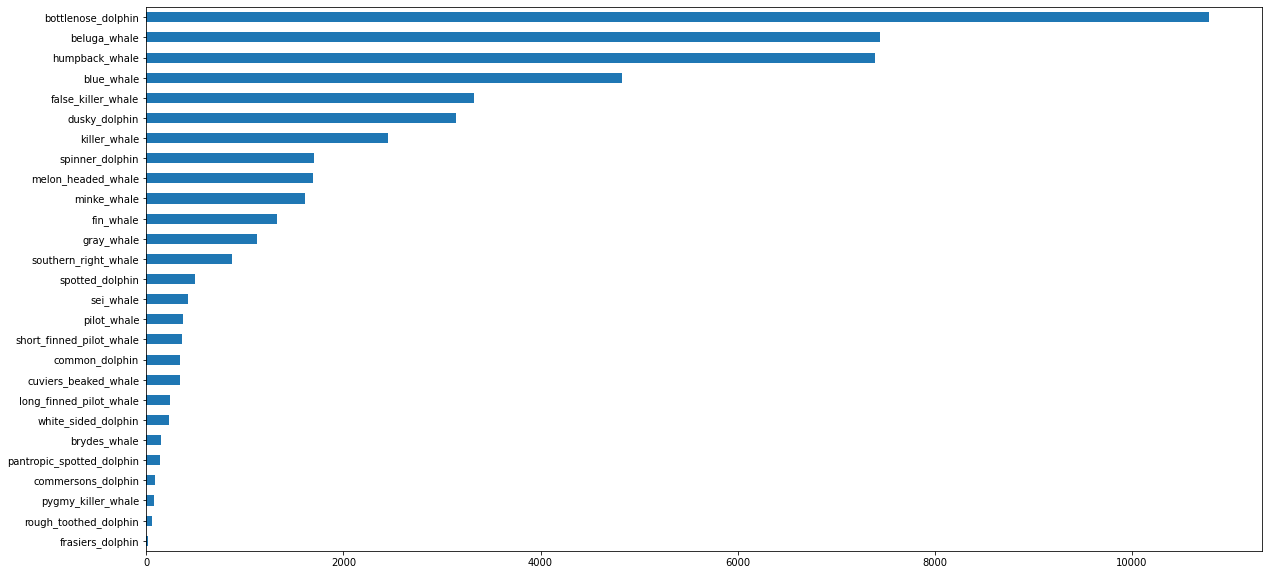

In [10]:
plt.figure(figsize=(20, 10))
df['species'].value_counts().sort_values(ascending=True).plot(kind='barh');

In [11]:
image_dir = Path('../input/happywhaleimagessortedbyspecies/train_species_list')

In [12]:
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)
image_counts = image_df['Label'].value_counts()

# Filter species with at least 100 images
image_df = image_df[image_df['Label'].isin(image_counts[image_counts >= 100].index)]

In [13]:
image_df

,Filepath,Label
0,../input/happywhaleimagessortedbyspecies/train...,short_finned_pilot_whale
1,../input/happywhaleimagessortedbyspecies/train...,short_finned_pilot_whale
2,../input/happywhaleimagessortedbyspecies/train...,short_finned_pilot_whale
3,../input/happywhaleimagessortedbyspecies/train...,short_finned_pilot_whale
4,../input/happywhaleimagessortedbyspecies/train...,short_finned_pilot_whale
...,...,...
51028,../input/happywhaleimagessortedbyspecies/train...,bottlenose_dolphin
51029,../input/happywhaleimagessortedbyspecies/train...,bottlenose_dolphin
51030,../input/happywhaleimagessortedbyspecies/train...,bottlenose_dolphin
51031,../input/happywhaleimagessortedbyspecies/train...,bottlenose_dolphin


In [14]:
image_df_copy = image_df.copy()
image_df_copy.loc[image_df_copy['Label'] == 'beluga', 'Label'] = 'beluga_whale'
image_df_copy.loc[image_df_copy['Label'] == 'globis', 'Label'] = 'pilot_whale'
image_df_copy.loc[image_df_copy['Label'] == 'bottlenose_dolpin', 'Label'] = 'bottlenose_dolphin'
image_df_copy.loc[image_df_copy['Label'] == 'kiler_whale', 'Label'] = 'killer_whale'

In [15]:
num_unique_labels = len(image_df_copy['Label'].value_counts())
print("Number of unique labels:", num_unique_labels)
image_df_copy['Label'].value_counts()

Number of unique labels: 23


bottlenose_dolphin           10781
beluga_whale                  7443
humpback_whale                7392
blue_whale                    4830
false_killer_whale            3326
dusky_dolphin                 3139
killer_whale                  2455
spinner_dolphin               1700
melon_headed_whale            1689
minke_whale                   1608
fin_whale                     1324
gray_whale                    1123
southern_right_whale           866
spotted_dolphin                490
sei_whale                      428
pilot_whale                    378
short_finned_pilot_whale       367
common_dolphin                 347
cuviers_beaked_whale           341
long_finned_pilot_whale        238
white_sided_dolphin            229
brydes_whale                   154
pantropic_spotted_dolphin      145
Name: Label, dtype: int64

In [16]:
# First, split into training (70%) and temp (30%)
train_df, temp_df = train_test_split(image_df_copy, train_size=0.7, shuffle=True, random_state=1)

# Then, split temp into validation and test equally
val_df, test_df = train_test_split(temp_df, train_size=0.5, shuffle=True, random_state=1)

In [17]:
from tensorflow.keras.applications.efficientnet import preprocess_input

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Updated to EfficientNet's preprocessing
)

val_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input  # Updated to EfficientNet's preprocessing
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input  # Updated to EfficientNet's preprocessing
)


In [18]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = val_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 35555 validated image filenames belonging to 23 classes.
Found 7619 validated image filenames belonging to 23 classes.
Found 7619 validated image filenames belonging to 23 classes.


In [19]:
from tensorflow.keras.applications import EfficientNetB0

pretrained_model = EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)


pretrained_model.trainable = False

16719872/16705208 [==============================] - 0s 0us/step


In [20]:
num_classes = len(train_images.class_indices)
print(f"Number of classes: {num_classes}")

Number of classes: 23


In [21]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)


print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
______________________________________________________________________________________________

In [22]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
from keras.callbacks import ModelCheckpoint
checkpoint_filepath = '/kaggle/working/checkpoint'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=False)

In [24]:
r = model.fit(
    train_images,
    validation_data=val_images,
    epochs=6,
    callbacks=[model_checkpoint_callback]  # Add your checkpoint here
)

Epoch 1/6
1112/1112 [==============================] - 229s 195ms/step - loss: 0.5818 - accuracy: 0.8224 - val_loss: 0.3862 - val_accuracy: 0.8748


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/6
1112/1112 [==============================] - 124s 111ms/step - loss: 0.3342 - accuracy: 0.8919 - val_loss: 0.3409 - val_accuracy: 0.8936


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 3/6
1112/1112 [==============================] - 124s 111ms/step - loss: 0.2745 - accuracy: 0.9104 - val_loss: 0.3213 - val_accuracy: 0.9004


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 4/6
1112/1112 [==============================] - 126s 113ms/step - loss: 0.2415 - accuracy: 0.9197 - val_loss: 0.2936 - val_accuracy: 0.9090


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 5/6
1112/1112 [==============================] - 121s 109ms/step - loss: 0.2074 - accuracy: 0.9309 - val_loss: 0.2651 - val_accuracy: 0.9177


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 6/6
1112/1112 [==============================] - 124s 111ms/step - loss: 0.1847 - accuracy: 0.9370 - val_loss: 0.2865 - val_accuracy: 0.9165


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


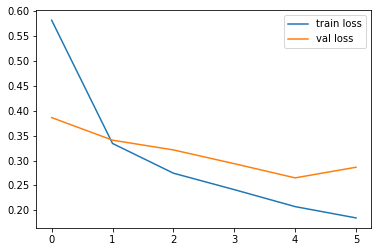

In [25]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

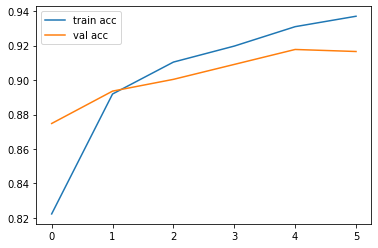

In [26]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [27]:
results = model.evaluate(test_images, verbose=0)
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Accuracy: 91.65%


In [28]:
predictions = np.argmax(model.predict(test_images), axis=1)

cm = confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=test_images.class_indices, zero_division=0)

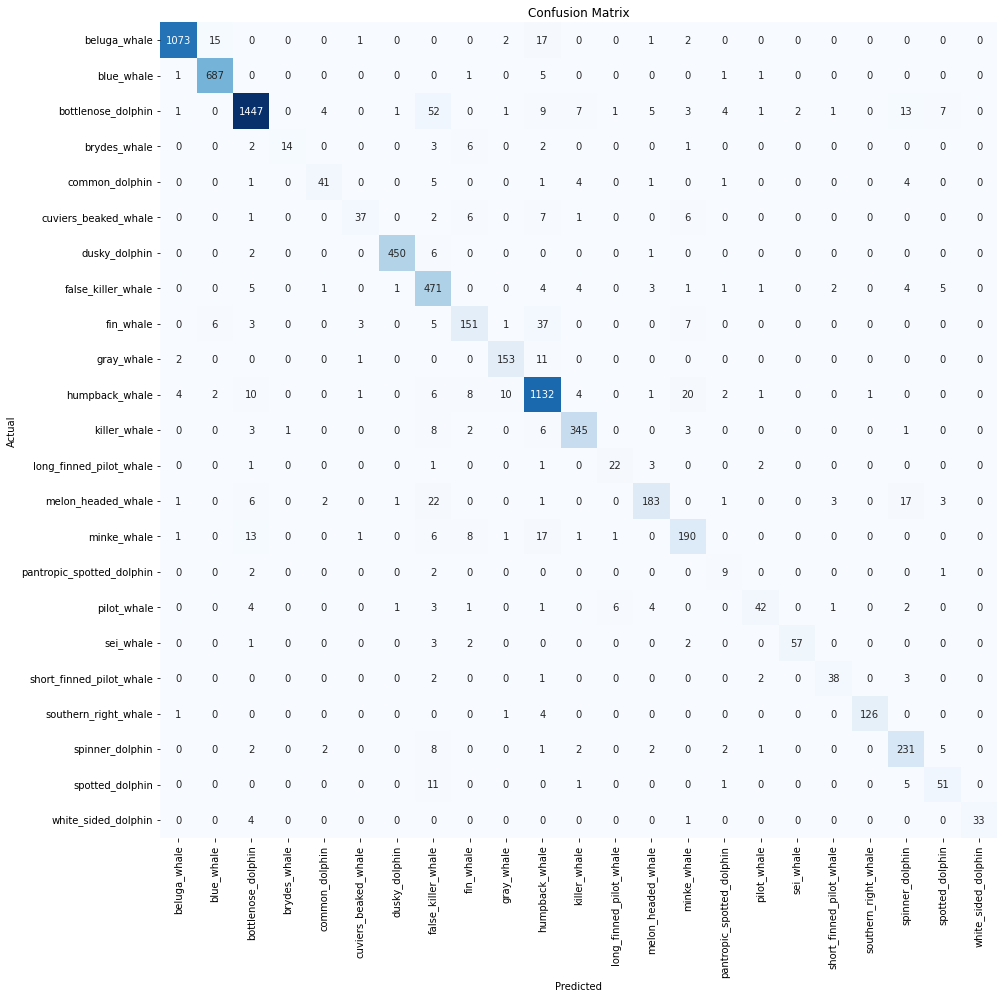

In [29]:
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(num_classes) + 0.5, labels=test_images.class_indices, rotation=90)
plt.yticks(ticks=np.arange(num_classes) + 0.5, labels=test_images.class_indices, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [30]:
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
                            precision    recall  f1-score   support

             beluga_whale       0.99      0.97      0.98      1111
               blue_whale       0.97      0.99      0.98       696
       bottlenose_dolphin       0.96      0.93      0.94      1559
             brydes_whale       0.93      0.50      0.65        28
           common_dolphin       0.82      0.71      0.76        58
     cuviers_beaked_whale       0.84      0.62      0.71        60
            dusky_dolphin       0.99      0.98      0.99       459
       false_killer_whale       0.76      0.94      0.84       503
                fin_whale       0.82      0.71      0.76       213
               gray_whale       0.91      0.92      0.91       167
           humpback_whale       0.90      0.94      0.92      1202
             killer_whale       0.93      0.93      0.93       369
  long_finned_pilot_whale       0.73      0.73      0.73        30
       melon_h

In [31]:
model.save('whale_classifier.h5')
model.save('/kaggle/working/whale_classifier.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [32]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array
model1 = load_model('/kaggle/working/whale_classifier.h5',compile=False)

In [33]:
lab = train_images.class_indices
lab={k:v for v,k in lab.items()}
print(lab)

{0: 'beluga_whale', 1: 'blue_whale', 2: 'bottlenose_dolphin', 3: 'brydes_whale', 4: 'common_dolphin', 5: 'cuviers_beaked_whale', 6: 'dusky_dolphin', 7: 'false_killer_whale', 8: 'fin_whale', 9: 'gray_whale', 10: 'humpback_whale', 11: 'killer_whale', 12: 'long_finned_pilot_whale', 13: 'melon_headed_whale', 14: 'minke_whale', 15: 'pantropic_spotted_dolphin', 16: 'pilot_whale', 17: 'sei_whale', 18: 'short_finned_pilot_whale', 19: 'southern_right_whale', 20: 'spinner_dolphin', 21: 'spotted_dolphin', 22: 'white_sided_dolphin'}


In [41]:
def output(location):
    img = load_img(location, target_size=(224, 224))
    img = img_to_array(img)
    img = preprocess_input(img)  # Preprocess the image
    img = np.expand_dims(img, axis=0)
    answer = model.predict(img)
    y_class = np.argmax(answer)
    res = lab[y_class]
    return res

'southern_right_whale'

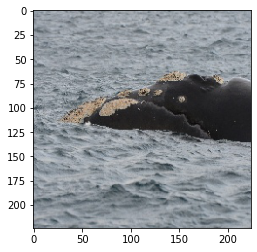

In [42]:
img='../input/happywhaleimagessortedbyspecies/train_species_list/southern_right_whale/01e1590083b363.jpg'
pic=load_img('../input/happywhaleimagessortedbyspecies/train_species_list/southern_right_whale/01e1590083b363.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

'dusky_dolphin'

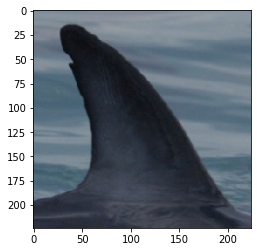

In [43]:
img='../input/happywhaleimagessortedbyspecies/train_species_list/dusky_dolphin/003e374b59c0e1.jpg'
pic=load_img('../input/happywhaleimagessortedbyspecies/train_species_list/dusky_dolphin/003e374b59c0e1.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)